# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../traffic-signs-data/train.p'
validation_file= '../traffic-signs-data/valid.p'
testing_file = '../traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import pandas as pd
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

label_names = pd.read_csv("./signnames.csv")
label_names = label_names.SignName

In [4]:
# In the folowing code, we will have a look at each sign from the 43 classes, chosen at random
def plot_images(sample_images, true_label=None, pred_label=None):
    
    # Create figure with 9x5 sub-plots.
    fig, axes = plt.subplots(15, 3, figsize=(18,50))
    fig.subplots_adjust(hspace=1, wspace=0.3)
    channels = sample_images.shape[:-1]
    for i, ax in enumerate(axes.flat):
        # Plot image.
        if i < len(sample_images):
            if channels == 3:
                ax.imshow(sample_images[i])
            else:
                ax.imshow(sample_images[i].squeeze(), cmap='gray')
            
            # TO-DO: Show true and predicted classes
            if true_label != None:
                if pred_label != None:
                    sign = "True: {0}\nPred: {1}".format(label_names[true_label[i]],label_names[pred_label[i]])
                else:
                    sign = "True: {}".format(label_names[true_label[i]])
                ax.set_title(sign)
            # Show the classes as the label on the x-axis.

            # Remove ticks from the plot.
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            ax.axis('off')
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [5]:
# show each sample from all classes, selected at random
sample_shape = [n_classes]
sample_shape.extend(list(image_shape))
sample_images = np.zeros(sample_shape)
sample_labels = []

for i in range(n_classes):
    idxs = y_train==i
    sample_train = X_train[idxs]
    idx = np.random.choice(range(len(sample_train)))
    sample_images[i] = sample_train[idx]
    sample_labels.append(i)

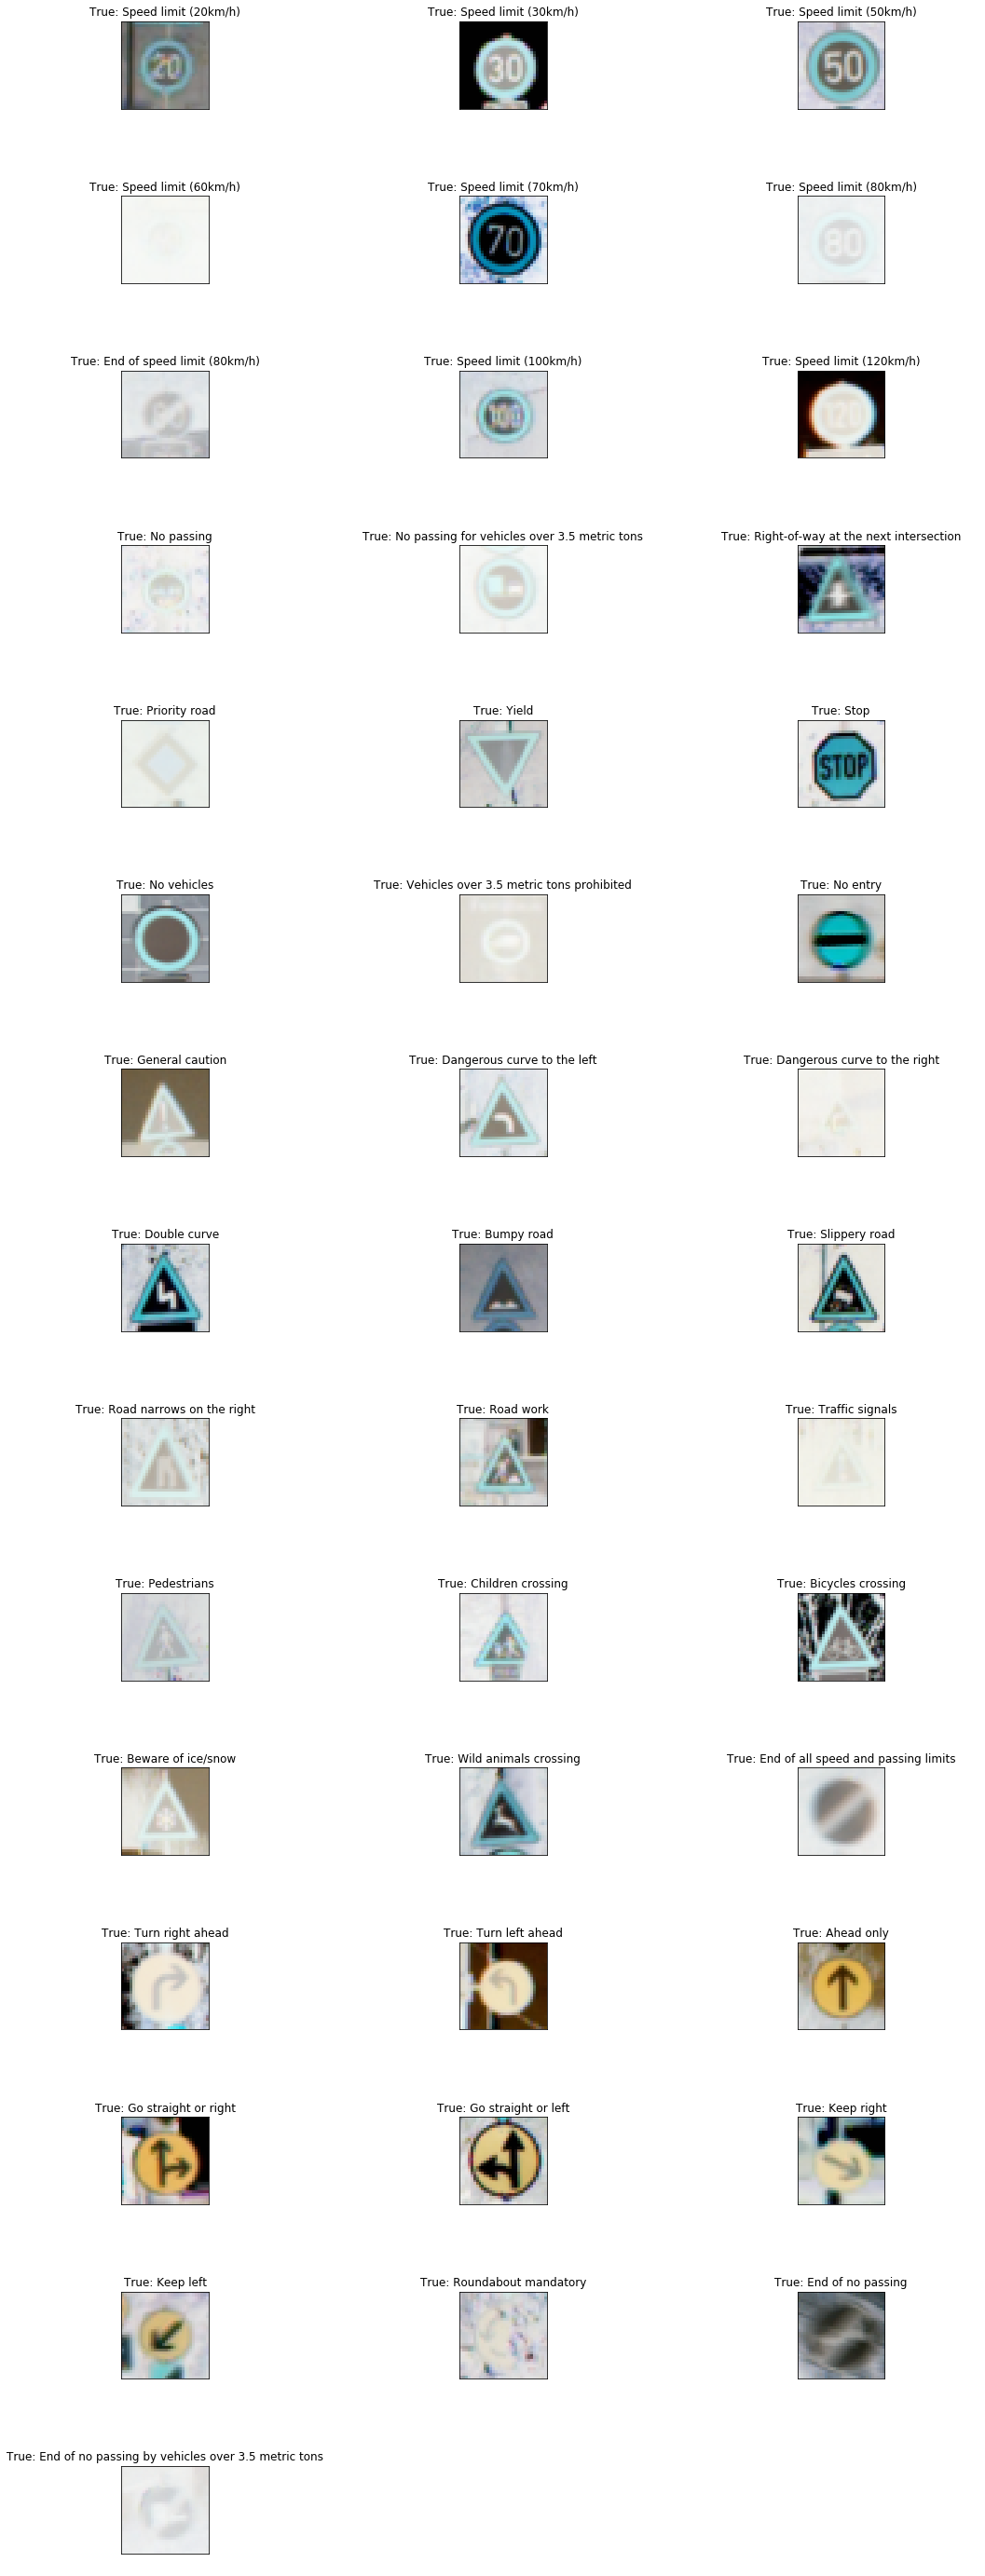

In [6]:
plot_images(sample_images, sample_labels)

#### Remark:
One interesting observation about these images is that many of them are very dull in contrast and brightness. Thus, it will be a good idea to convert them to a different colorspace so that important characterictics are starkely visible. This could, in turn, help in the higher accuracy of the classifier.

In [7]:
import tensorflow as tf
data_sess = tf.Session()

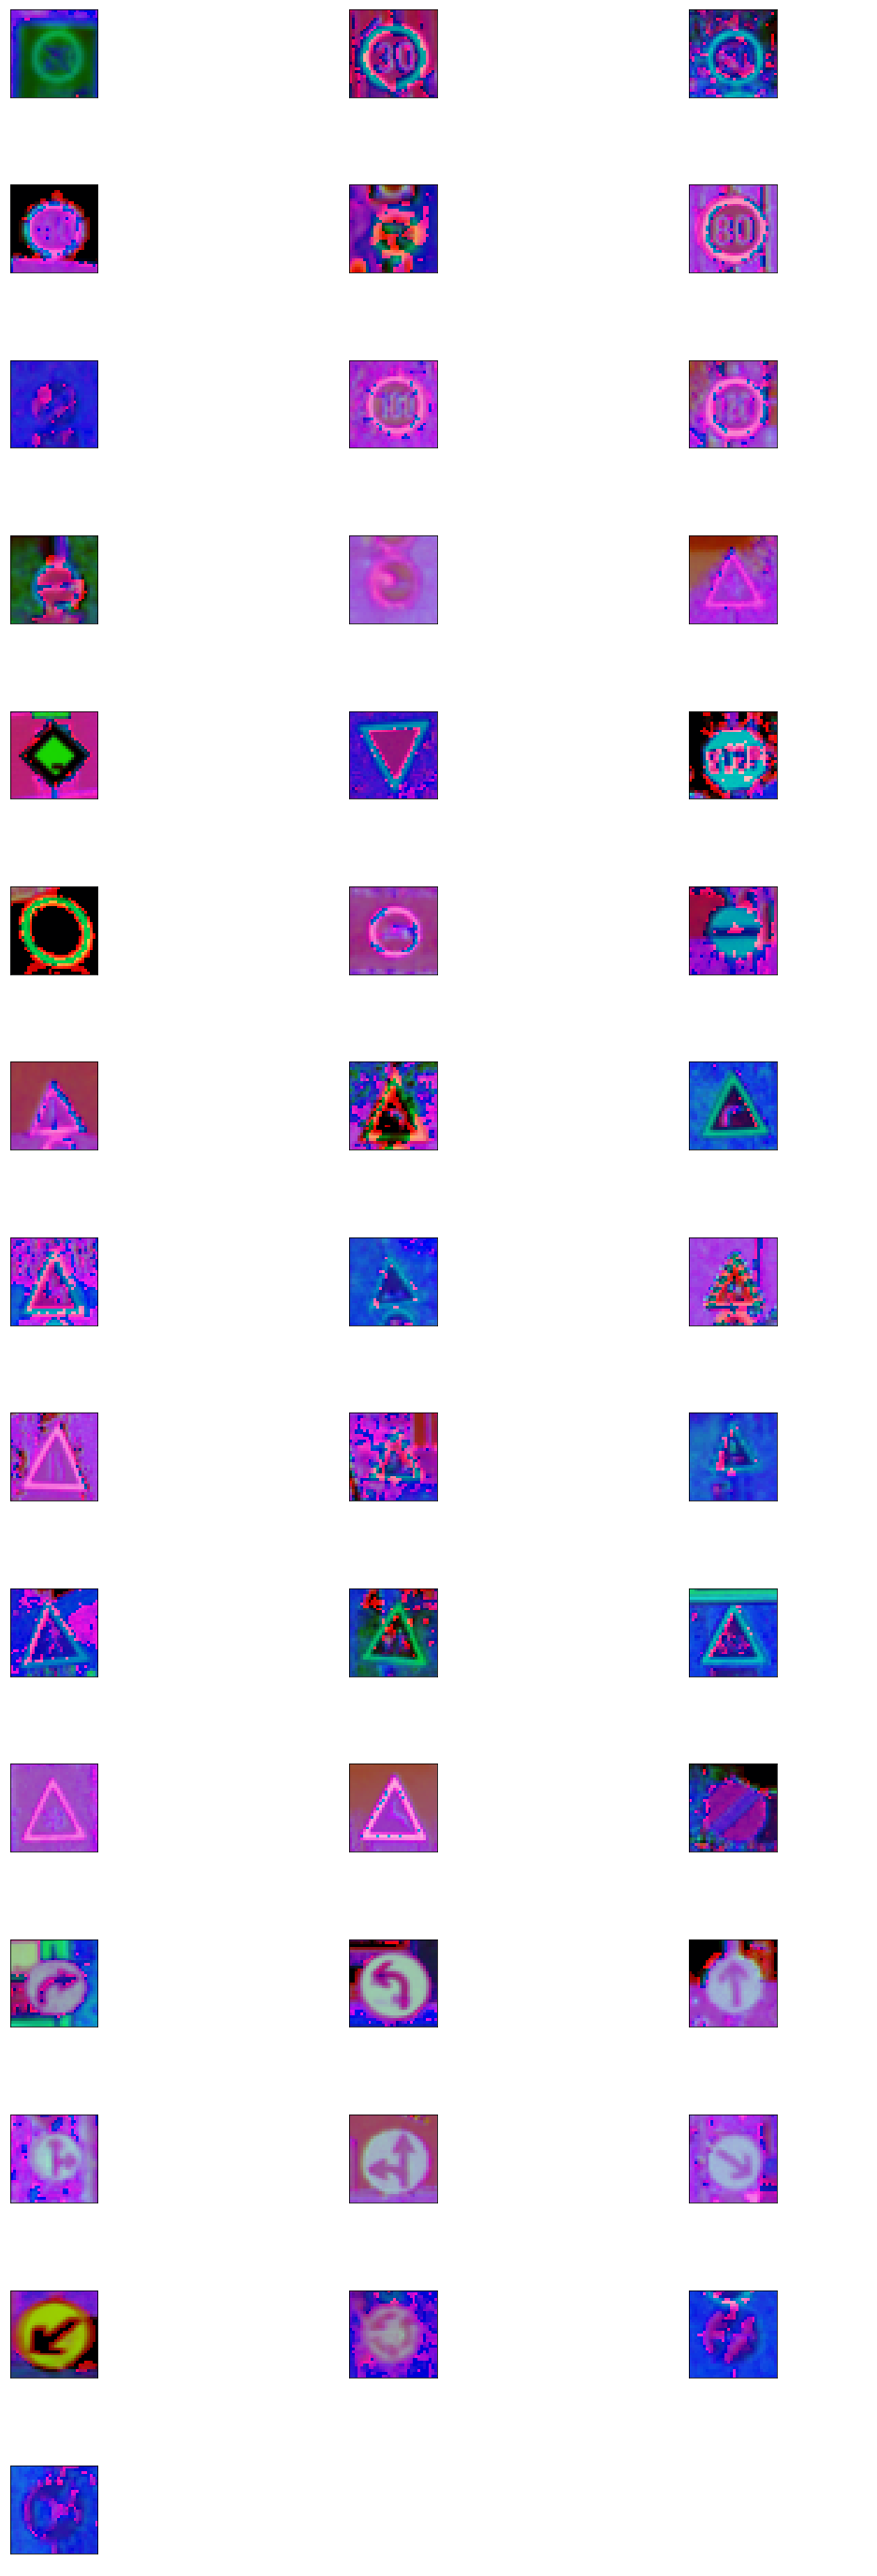

In [8]:
# look at the hsv colorspace images
X_train_hsv = tf.image.rgb_to_hsv(X_train)
with data_sess.as_default():
    X_train_hsv = X_train_hsv.eval()

sample_images = np.zeros(sample_shape)

for i in range(n_classes):
    idxs = y_train==i
    sample_train = X_train_hsv[idxs]
    idx = np.random.choice(range(len(sample_train)))
    sample_images[i] = sample_train[idx]

plot_images(sample_images)

Looks like HSV Colorspace won't help much as some of the images are clearly not represented well. Can try the brightness and contrast adjustment next.

In [ ]:
# look at the change in brightness and contrast values of the images
# tried multiple values here.
X_train_bright = tf.image.adjust_brightness(X_train, 0.2)
X_train_contrast = tf.image.adjust_contrast(X_train_bright, 0.2)

with data_sess.as_default():
    X_train_contrast = X_train_contrast.eval()
    
sample_images = np.zeros(sample_shape)

for i in range(n_classes):
    idxs = y_train==i
    sample_train = X_train_contrast[idxs]
    idx = np.random.choice(range(len(sample_train)))
    sample_images[i] = sample_train[idx]

plot_images(sample_images)

These also don't look very good. Lastly, we can have a look at the grayscaled images and then finally we can proceed with data augmentation and normalization.

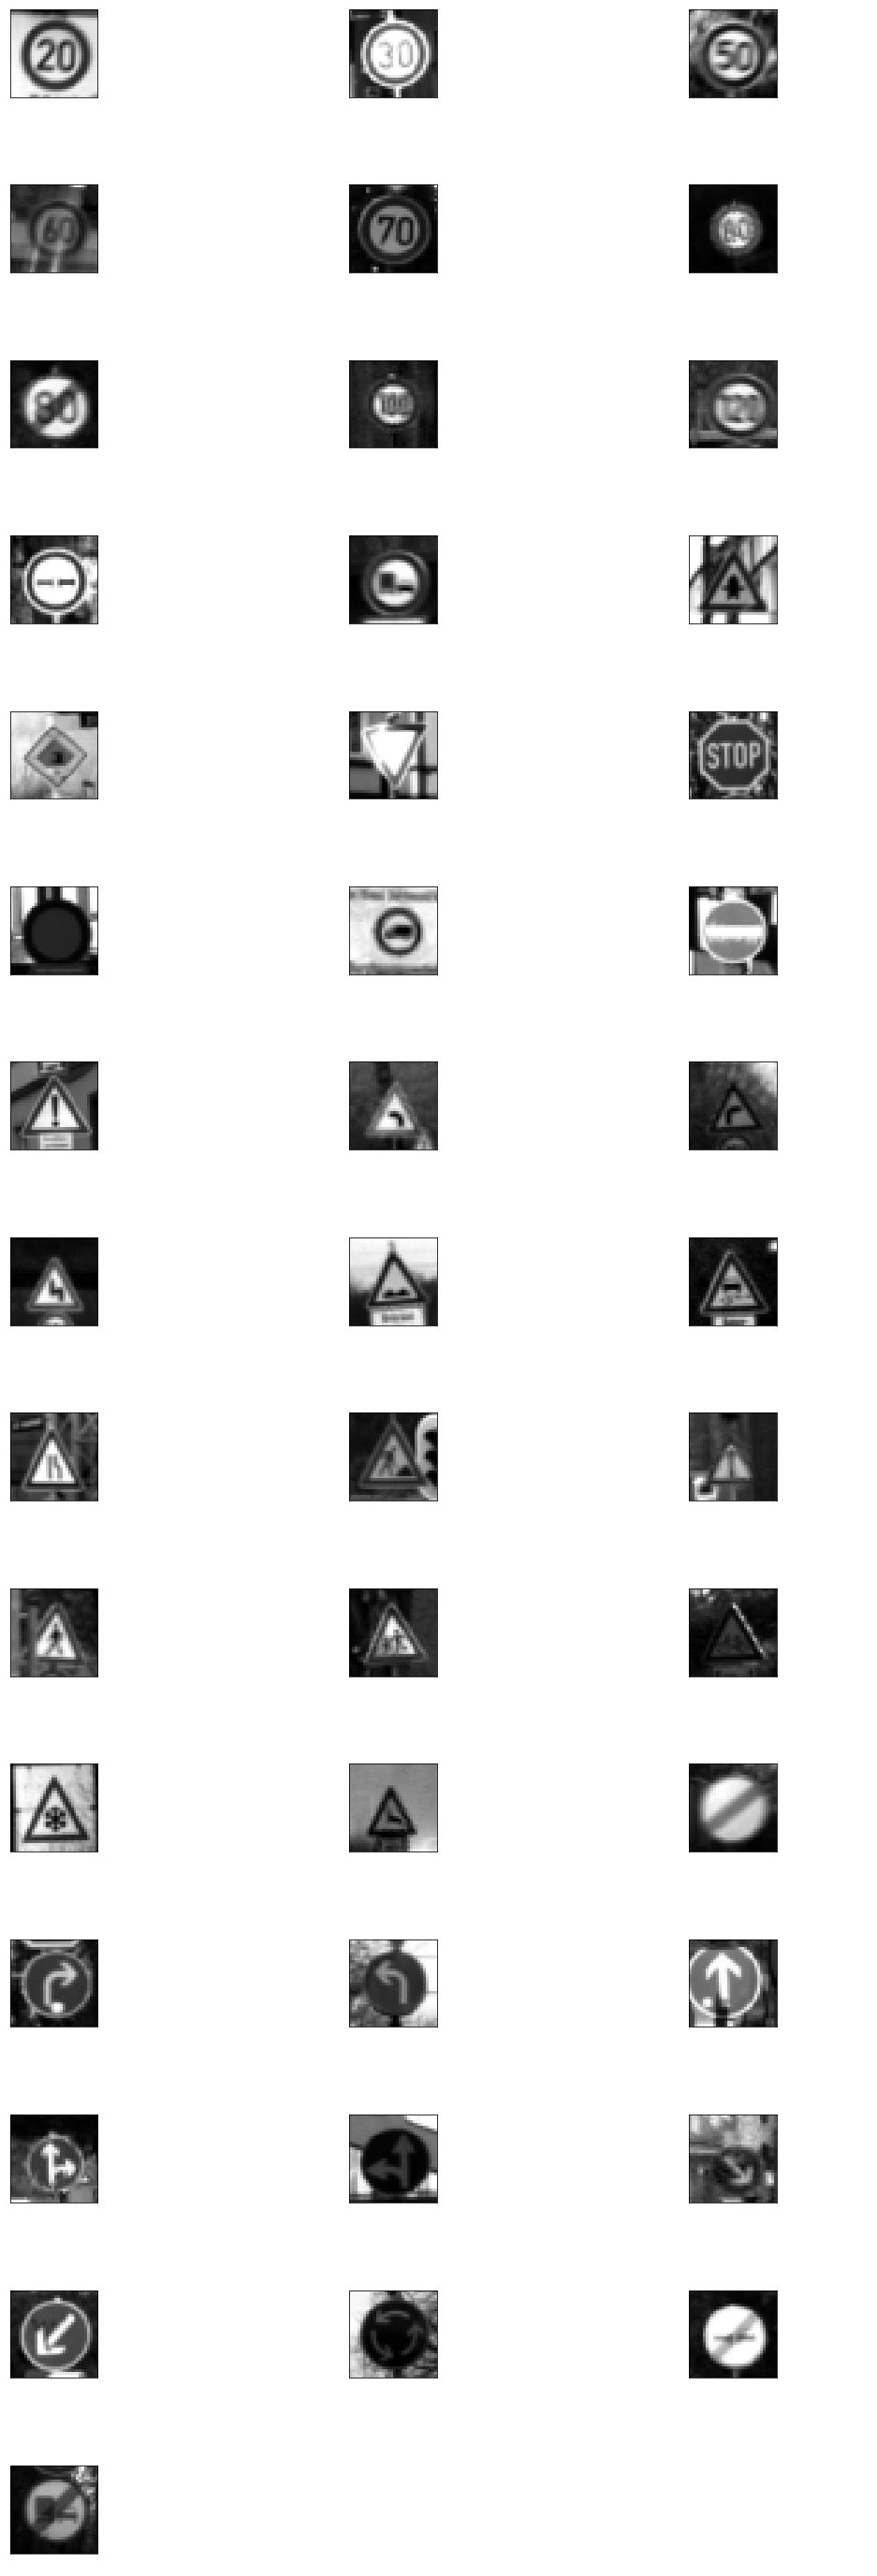

In [9]:
X_train_gray = tf.image.rgb_to_grayscale(X_train)
with data_sess.as_default():
    X_train_gray = X_train_gray.eval()

gray_image_shape = X_train_gray[0].shape
gray_sample_shape = [n_classes]
gray_sample_shape.extend(list(gray_image_shape))
sample_images = np.zeros(gray_sample_shape)

for i in range(n_classes):
    idxs = y_train==i
    sample_train = X_train_gray[idxs]
    idx = np.random.choice(range(len(sample_train)))
    sample_images[i] = sample_train[idx]
    
plot_images(sample_images)

Looks like grayscale images capture better information about each sign than the RGB images. We should now convert the train and validation images to the grayscale and then generate some random crops and rotation, followed by data normalization.

We also need to convert the validation and test data to grayscale accordingly.

In [11]:
X_train = X_train_gray

X_valid_gray = tf.image.rgb_to_grayscale(X_valid)
with data_sess.as_default():
    X_valid = X_valid_gray.eval()
    
X_test_gray = tf.image.rgb_to_grayscale(X_test)
with data_sess.as_default():
    X_test = X_test_gray.eval()

In [12]:
data_sess.close()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

I really wanted to use Tensorflow library functions for data augmentation and I found [this](https://medium.com/ymedialabs-innovation/data-augmentation-techniques-in-cnn-using-tensorflow-371ae43d5be9) reference a lot useful for setting up the pipeline.

More specifically, I plan to use scaling and translation for data augmentation.

In [17]:
# Scale images
tf.reset_default_graph()
def central_scale_images(X_imgs, scaleRange, labels):
    """ 
    This function generates same number of images as input 
    images but, with a random scaled version of each between
    the range specified in the scaleRange.
    """
    img_shape = X_imgs.shape
#     boxes = np.zeros([1, 4], dtype=np.float32)
    scale = np.random.uniform(low=scaleRange[0], high=scaleRange[1])
    x1 = y1 = 0.5 - 0.5*scale     # for central scale
    x2 = y2 = 0.5 + 0.5*scale
    box = np.array([x1, y1, x2, y2], dtype=np.float32)
    box_idx = np.zeros((1), dtype=np.int32)
    crop_size = np.array([image_shape[0], image_shape[1]], dtype=np.int32)

    X = tf.placeholder(tf.float32, shape=[None].extend(img_shape[1:]))
    scaled_img = tf.image.crop_and_resize(X, box, box_idx, crop_size)
    X_scaled_data = []
    y_scaled = []
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        # Need to do it for each image otherwise it just does one.
        for idx, img_data in enumerate(X_imgs):
            batch_img = np.expand_dims(img_data, axis=0)
            scaled_imgs = sess.run(scaled_img, feed_dict={X: batch_img})
            X_scaled_data.extend(scaled_imgs)
            y_scaled.extend([labels[idx]])
        X_scaled_data = np.array(X_scaled_data, dtype=np.float32)
        y_scaled = np.array(y_scaled, dtype=np.uint8)
    tf.reset_default_graph()
    return X_scaled_data, y_scaled

# translate images
def get_translate_parameters_10(index, img_shape, factor):
    # percent should be from the range 0-100. 100 is impractical.
    # TO-DO: fix the confused notation of percent. The function would keep percent and translate by 1-percent
    img_w = img_shape[1]
    img_h = img_shape[0]
#     translate_factor = percent/100
    if index == 0: # Translate left by 10 percent
        offset = np.array([0.0, 1-factor], dtype = np.float32)
        size = np.array([img_h, ceil(factor * img_w)], dtype = np.int32)
        w_start = 0
        w_end = int(ceil(factor * img_w))
        h_start = 0
        h_end = img_h
    elif index == 1: # Translate right by 10 percent
        offset = np.array([0.0, -(1-factor)], dtype = np.float32)
        size = np.array([img_h, ceil(factor * img_w)], dtype = np.int32)
        w_start = int(floor((1 - factor) * img_w))
        w_end = img_w
        h_start = 0
        h_end = img_h
    elif index == 2: # Translate top by 10 percent
        offset = np.array([(1-factor), 0.0], dtype = np.float32)
        size = np.array([ceil(factor * img_h), img_w], dtype = np.int32)
        w_start = 0
        w_end = img_w
        h_start = 0
        h_end = int(ceil(factor * img_h)) 
    else: # Translate bottom by 10 percent
        offset = np.array([-(1 - factor), 0.0], dtype = np.float32)
        size = np.array([ceil(factor * img_h), img_w], dtype = np.int32)
        w_start = 0
        w_end = img_w
        h_start = int(floor((1 - factor) * img_h))
        h_end = img_h 
        
    return offset, size, w_start, w_end, h_start, h_end

# translate images
from math import ceil, floor
def translate_images_10(X_imgs, labels, factor):
    """
    This function generates either of possible 4 translations
    by 10%, at random.
    The outpt shape is the same as the input shape.
    """
    offsets = np.zeros((len(X_imgs), 2), dtype = np.float32)
#     X_translated_arr = []
    y_translated = []
    img_shape = X_imgs.shape[1:]
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        X_translated = np.zeros((len(X_imgs), img_shape[0], img_shape[1], img_shape[2]), \
                                    dtype = np.float32)
        X_translated.fill(255.0) # Filling background color
        for idx, img_data in enumerate(X_imgs):
            i = np.random.randint(high=4)
            base_offset, size, w_start, w_end, h_start, h_end = get_translate_parameters_10(i, image_shape, factor)
            offsets[:, :] = base_offset 
            glimpse = tf.image.extract_glimpse(img_data, size, offsets)
            
            glimpse = sess.run(glimpse)
            X_translated[idx, h_start: h_start + size[0], \
                         w_start: w_start + size[1], :] = glimpse
#             X_translated_arr.extend(X_translated)
#             y_translated.extend(labels)
    X_translated_arr = np.array(X_translated, dtype=np.float32)
    y_translated = np.array(y_translated, dtype=np.uint8)
    tf.reset_default_graph()
    return X_translated_arr, y_translated

# rotate images
def rotate_imgs(X_imgs, rotRange, labels):
    pass

In [18]:
scaled_train, scaled_labels = central_scale_images(X_train, [0.7, 0.9], y_train)

ValueError: Shape must be rank 2 but is rank 1 for 'CropAndResize' (op: 'CropAndResize') with input shapes: ?, [4], [1], [2].

In [ ]:
sample_images = np.zeros(gray_sample_shape)

for i in range(n_classes):
    idxs = scaled_labels==i
    sample_train = scaled_train[idxs]
    idx = np.random.choice(range(len(sample_train)))
    sample_images[i] = sample_train[idx]

In [ ]:
plot_images(sample_images)

In [ ]:
trans_train, trans_labels = translate_images_10(X_train_gray, y_train, 0.8)

In [ ]:
trans_train.shape

In [ ]:
sample_images = np.zeros(gray_sample_shape)

for i in range(n_classes):
    idxs = trans_labels==i
    sample_train = trans_train[idxs]
    idx = np.random.choice(range(len(sample_train)))
    sample_images[i] = sample_train[idx]

In [ ]:
plot_images(sample_images)

And of course, there can be variations to these data augmentation functions to limit the number of samples generated. Moreover, can also have a few more different types like random sheer, or random change in brightness/contrast. Can modify/try these later.

Currently, I have 5 times the dataset as provided for input.

Let's combine everything before starting the training.

In [ ]:
X_train = np.concatenate((X_train_gray, scaled_train, trans_train))
y_train = np.concatenate((y_train, scaled_labels, trans_labels))
print("Len of total train data: {}".format(len(y_train)))

In [ ]:
## Save this augmented data into pickle file so that next time can start from the next cell.
# Save all train, valid and test data
train['features'] = X_train
train['labels'] = y_train
with open('train_data.augmented.p', 'wb') as f_train:
    pickle.dump(train, f_train)
f_train.close()

In [ ]:
valid['features'] = X_valid
valid['labels'] = y_valid
with open('validation_data.augmented.p', 'wb') as f_valid:
    pickle.dump(valid, f_valid)
f_valid.close()

In [ ]:
test['features'] = X_test
test['labels'] = y_test
with open('test_data.augmented.p', 'wb') as f_test:
    pickle.dump(test, f_test)
f_test.close()

### Load the augmented data and then use it for the training

In [ ]:
import pickle
import tensorflow as tf
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
from math import ceil, floor

In [ ]:
training_file = 'train_data.augmented.p'
validation_file= 'validation_data.augmented.p'
testing_file = 'test_data.augmented.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

Now, let's shuffle the data and normalize it

In [ ]:
X_train = (X_train / 255) - 0.5
X_valid = (X_valid / 255) - 0.5
X_test = (X_test / 255) - 0.5

### Model Architecture

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Use a VGG16 like architecture with dropout and batch normalization
### However, it will have smaller depth as the input image is only 32x32

# important to reset the graph as it was used before for data augmentation
# Add batch normalization
tf.reset_default_graph()

from tensorflow.contrib.layers import flatten

def myNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    weights = {
                'wc1': tf.Variable(tf.truncated_normal([3, 3, 1, 16], mean=mu, stddev=sigma)),
                'wc2': tf.Variable(tf.truncated_normal([3, 3, 16, 16], mean=mu, stddev=sigma)),
                'wc3': tf.Variable(tf.truncated_normal([3, 3, 16, 32], mean=mu, stddev=sigma)),
                'wc4': tf.Variable(tf.truncated_normal([3, 3, 32, 32], mean=mu, stddev=sigma)),
                'wc5': tf.Variable(tf.truncated_normal([3, 3, 32, 64], mean=mu, stddev=sigma)),
                'wc6': tf.Variable(tf.truncated_normal([3, 3, 64, 64], mean=mu, stddev=sigma)),
                'wf1': tf.Variable(tf.truncated_normal([1024, 1024], mean=mu, stddev=sigma)),
                'wf2': tf.Variable(tf.truncated_normal([1024, 1024], mean=mu, stddev=sigma)),
                'wout': tf.Variable(tf.truncated_normal([1024, 43], mean=mu, stddev=sigma))
                }
    biases = {
                'bc1': tf.Variable(tf.zeros(16)),
                'bc2': tf.Variable(tf.zeros(16)),
                'bc3': tf.Variable(tf.zeros(32)),
                'bc4': tf.Variable(tf.zeros(32)),
                'bc5': tf.Variable(tf.zeros(64)),
                'bc6': tf.Variable(tf.zeros(64)),
                'bf1': tf.Variable(tf.zeros(1024)),
                'bf2': tf.Variable(tf.zeros(1024)),
                'bout': tf.Variable(tf.zeros(43))
    }
    
    #  Layer 1: Convolutional. Input = 32x32x3. Output = 32x32x8.
    convLayer1 = tf.nn.conv2d(input=x, filter=weights['wc1'], strides=[1, 1, 1, 1], padding='SAME')
    convLayer1 = tf.nn.bias_add(convLayer1, biases['bc1'])
    #  Activation.
    convLayer1 = tf.nn.elu(convLayer1)
    #  Layer 2: Convolutional. Output = 32x32x8.
    convLayer2 = tf.nn.conv2d(input=convLayer1, filter=weights['wc2'], strides=[1, 1, 1, 1], padding='SAME')
    convLayer2 = tf.nn.bias_add(convLayer2, biases['bc2'])
    #  Activation.
    convLayer2 = tf.nn.elu(convLayer2)
    #  Pooling 1. Input = 32x32x8. Output = 16x16x8.
    pool1 = tf.nn.max_pool(value=convLayer2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    #  Layer 3: Convolutional. Input = 16x16x8. Output = 16x16x16.
    convLayer3 = tf.nn.conv2d(input=pool1, filter=weights['wc3'], strides=[1, 1, 1, 1], padding='SAME')
    convLayer3 = tf.nn.bias_add(convLayer3, biases['bc3'])
    #  Activation.
    convLayer3 = tf.nn.elu(convLayer3)
    #  Layer 4: Convolutional. Output = 16x16x16.
    convLayer4 = tf.nn.conv2d(input=convLayer3, filter=weights['wc4'], strides=[1, 1, 1, 1], padding='SAME')
    convLayer4 = tf.nn.bias_add(convLayer4, biases['bc4'])
    #  Activation.
    convLayer4 = tf.nn.elu(convLayer4)
    #  Pooling 2. Input = 16x16x16. Output = 8x8x16.
    pool2 = tf.nn.max_pool(value=convLayer4, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    #  Layer 5: Convolutional. Output = 8x8x32.
    convLayer5 = tf.nn.conv2d(input=pool2, filter=weights['wc5'], strides=[1, 1, 1, 1], padding='SAME')
    convLayer5 = tf.nn.bias_add(convLayer5, biases['bc5'])
    #  Activation.
    convLayer5 = tf.nn.elu(convLayer5)
    #  Layer 6: Convolutional. Output = 8x8x32.
    convLayer6 = tf.nn.conv2d(input=convLayer5, filter=weights['wc6'], strides=[1, 1, 1, 1], padding='SAME')
    convLayer6 = tf.nn.bias_add(convLayer6, biases['bc6'])
    #  Activation.
    convLayer6 = tf.nn.elu(convLayer6)
    #  Pooling 2. Input = 8x8x32. Output = 4x4x32.
    pool3 = tf.nn.max_pool(value=convLayer6, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    #  Flatten. Input = 4x4x32. Output = 512.
    fcLayer0 = flatten(pool3)
    #  Dropout: Probability - 0.4
    fcLayer0 = tf.nn.dropout(fcLayer0, keep_prob=0.4)
    #  Layer 3: Fully Connected. Input = 512. Output = 512.
    fcLayer1 = tf.add(tf.matmul(fcLayer0, weights['wf1']), biases['bf1'])
    #  Activation.
    fcLayer1 = tf.nn.elu(fcLayer1)
    #  Dropout: Probability - 0.4
    fcLayer1 = tf.nn.dropout(fcLayer1, keep_prob=0.4)
    #  Layer 4: Fully Connected. Input = 512. Output = 512.
    fcLayer2 = tf.add(tf.matmul(fcLayer1, weights['wf2']), biases['bf2'])
    #  Activation.
    fcLayer2 = tf.nn.elu(fcLayer2)
    #  Dropout: Probability - 0.4
    fcLayer2 = tf.nn.dropout(fcLayer2, keep_prob=0.4)
    #  Layer 5: Fully Connected. Input = 512. Output = 43.
    logits = tf.add(tf.matmul(fcLayer2, weights['wout']), biases['bout'])
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

#### Set the input data

In [ ]:
x = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

#### Define train parameters, i.e., loss and optimization functions

In [ ]:
logits = myNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

## decay the learning rate
# https://www.tensorflow.org/versions/r1.3/api_docs/python/tf/train/exponential_decay
global_step = tf.Variable(0, trainable=False)
starter_rate = 0.0001
rate = tf.train.natural_exp_decay(learning_rate=starter_rate, global_step=global_step, decay_rate=0.5, decay_steps=10)
optimizer = tf.train.AdamOptimizer(learning_rate = starter_rate)
training_operation = optimizer.minimize(loss_operation, global_step=global_step)

#### Define model evaluation criteria

In [ ]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE*2):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#### Train the model

In [ ]:
# from tqdm import tqdm
# Important variables for training
EPOCHS = 100
BATCH_SIZE = 128


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    num_examples_valid = len(X_valid)
    print("Training...")
    print()
    for i in range(EPOCHS):
        # batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(i+1, EPOCHS), unit='batches')
        X_train, y_train = shuffle(X_train, y_train)
        training_loss = 0
        training_accuracy = 0
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            _, loss, acc = sess.run([training_operation, loss_operation, accuracy_operation], 
                                    feed_dict={x: batch_x, y: batch_y})
            training_loss += loss * len(batch_x)
            training_accuracy += acc * len(batch_x)
        
        validation_loss = 0
        validation_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples_valid, BATCH_SIZE*2):
            batch_x, batch_y = X_valid[offset:offset+BATCH_SIZE], y_valid[offset:offset+BATCH_SIZE]
            loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y})
            validation_accuracy += (accuracy * len(batch_x))
            validation_loss += loss * len(batch_x)
        
        training_loss = training_loss/num_examples
        training_accuracy = training_accuracy/num_examples
        validation_loss = validation_loss/num_examples_valid
        validation_accuracy = validation_accuracy/num_examples_valid
        print("EPOCH {} ...".format(i+1))
        print("Training Loss: {0:.3f}... Training Accuracy = {1:.3f}".format(training_loss, training_accuracy))
        print("Validation Loss: {0:.3f}... Validation Accuracy = {1:.3f}".format(validation_loss, validation_accuracy))
        print()
        
    saver.save(sess, './mynet')
    print("Model saved")

In [ ]:
sess.close()

#### Evaluate the model on the test data

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")